In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 
import matplotlib.image as mpimg

## Next, we set up and run some 2D simulations 

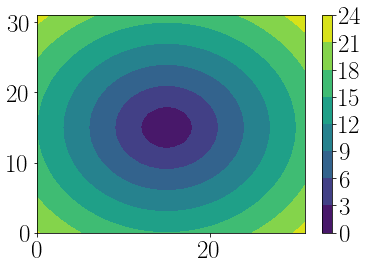

In [22]:
X, Y = np.meshgrid(np.arange(Lx), np.arange(Ly))
Z = np.sqrt((X-15)**2+(Y-15)**2)

plt.contourf(Z)
plt.colorbar() 
plt.show() 

In [ ]:
# Set up model parameters 
epsilon = 1
eta = -0.1 # asymmetry parameter
sigma = 0.15 # disorder
mean_omega = 0.5
g = 0.5
BC = 'grad'

# Set up simulation parameters 
Lx = 32
Ly = 32
T = 1000
n_frames = T

# Initialise the model and run the simulation 
model = Kuramoto2D(epsilon, eta, sigma, mean_omega, BC=BC, grad=[g, -g, g, -g])
model.initialise(Lx, Ly, T, n_frames, seed=1000)
# model.omegas[15, 15] += 0.4
# model.omegas[0]=0 
# model.omegas[-1]=0 
# model.omegas[:, 0]=0
# model.omegas[:, -1]=0
# model.omegas = 0.5-Z*0.01 
model.evolve() 

 60%|█████▉    | 596/1000 [00:49<00:41,  9.83it/s]

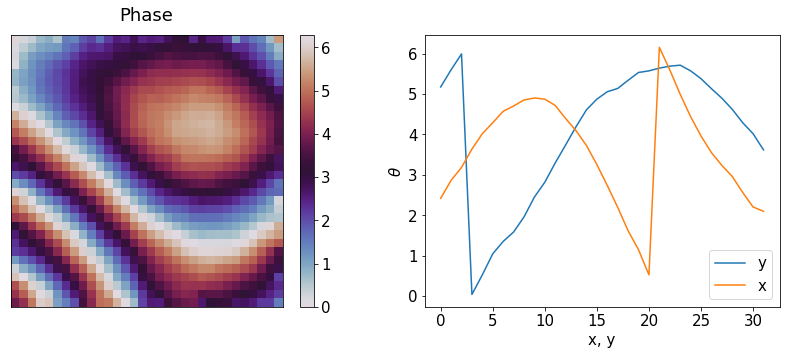

In [50]:
last_slice = model.res[-1].reshape((Lx, Ly)) % (2*np.pi)

plt.rcParams.update({
    "font.size": 15,
})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

im = axes[0].imshow(last_slice, vmin=0, vmax=2*np.pi, cmap='twilight')
# axes[0].contour(np.sin(last_slice), colors='white')
plt.colorbar(im, ax=axes[0])
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title(r'Phase', y=1.03)

axes[1].plot((last_slice[10]), label='y')
axes[1].plot((last_slice[:, 15]), label='x')
axes[1].set_xlabel('x, y')
axes[1].legend()
axes[1].set_ylabel(r'$\theta$')

plt.savefig('Figures/Kuramoto2D_BC={}_eta={}_sigma={}_g={}.pdf'.format(BC, eta, sigma, g))
plt.show() 

## Make movie of the 2D simulation 

In [46]:
# Reshape the result into 2D shape 
N = 50 # number of frames to use in making the movie 
phase_evolution = model.res.reshape((model.n_frames, model.Lx, model.Ly))
phase_evolution = phase_evolution[::int(n_frames/N)]

# Set up figure plotting 
plt.rc('font', size=25)
fig = plt.figure(figsize=(13, 10))
low, high = 0, 2*np.pi 

# Plot the movie one snapshot at a time 
ims = []

plt.title(r'$\sigma={}, \epsilon ={}, \eta ={}$'.format(sigma, epsilon, eta))
plt.axis('off')
# cbar = plt.colorbar(im, shrink=0.6)
# cbar.set_ticks([0, 2*np.pi])
# cbar.set_ticklabels([r'0', r'$2\pi$'])
plt.tight_layout()
for i in range(N):
    xy = phase_evolution[i].T % (2*np.pi)
    im = plt.imshow(xy, vmin=low, vmax=high, animated=True, cmap='twilight')
#     im = plt.imshow(xy < 0.1, vmin=0, vmax=1, animated=True, cmap='plasma')
    plt.axis('off')
    ims.append([im])
ani = am.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
mywriter = am.FFMpegWriter()
ani.save("movie.mp4", writer=mywriter)
plt.close()


## Now you will find a .mp4 file in the same folder